In [1]:
# Homework 3: Old Faithful Geyser Dataset

# ========================
# Problem 1
# ========================

# Installing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving faithful.csv to faithful.csv


In [3]:
# Load the dataset
import io
faithful = pd.read_csv(io.BytesIO(uploaded['faithful.csv']))

In [4]:
# Display first few rows
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


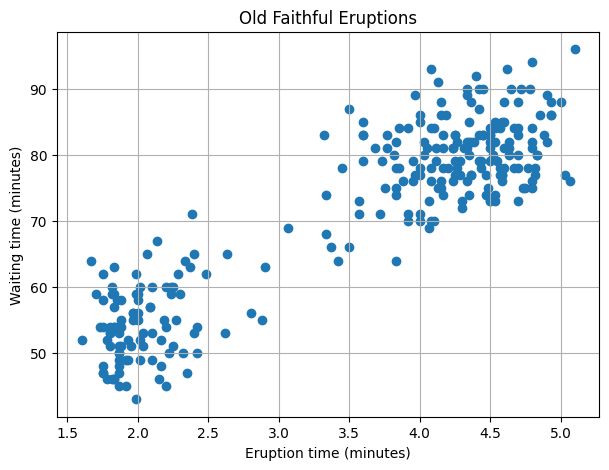

In [ ]:
# Problem 1 (25 points) - (a)	Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)

# Scatter plot: eruption time vs waiting time
plt.figure(figsize=(7,5))
plt.scatter(faithful['eruptions'], faithful['waiting'])
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Old Faithful Eruptions')
plt.grid(True)
plt.show()

In [ ]:
# Problem 1 - (b)	How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)
# Solution:
# Based on the scatter plot, we can see 2 clear clusters.
# 1.	One cluster consists of shorter eruptions (around 2 minutes or less) with shorter waiting times (around 50-70 minutes).
# 2.	Another cluster consists of longer eruptions (around 4-5 minutes) with longer waiting times (around 75-90 minutes).
# There is a gap between these two groups where fewer points appear, supporting the idea of two separate clusters.
# Thus, for this analysis, I assume that the natural number of clusters in the data is 2.

# ======================== # ======================== # ======================== # ======================== # ======================== # ======================== # ======================== # ======================== # ========================

# Problem 1 - (c)	Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points)
# Solution:
# The Hierarchical clustering algorithm includes the following steps:
# 1.	First, treat each data point as its own individual cluster. So at the beginning, you have as many clusters as the points.
# 2.	Next, calculate the distance between every pair of clusters.
# 3.	Find the two clusters that are closest together and merge them into one bigger cluster.
# 4.	Then, update the distances between this new cluster and all the other clusters.
# 5.	Keep repeating the merge-and-update process until everything is combined into a single cluster.
# Looking at the scatter plot, I think hierarchical clustering would be a good method for this dataset. The points clearly form two separate groups, so it would be easy for the algorithm to pick up on that.
# However, if the dataset were much bigger, hierarchical clustering might not be the best choice because it can get slow and doesn’t always handle noisy data very well. In that case, I feel like a method like K-means could be more efficient.


In [5]:
# ======================== # ======================== # ========================
# Problem 2
# ======================== # ======================== # ========================

# Implement the k-means algorithm in Python and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, which contains instance ID numbers.
# In your notebook, including the following items:

# Problem 2 - (a)	Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

# Implement k-means from scratch
import random
import numpy as np
import pandas as pd

# Prepare data (ignore any ID column if exists)
faithful = pd.read_csv(io.BytesIO(uploaded['faithful.csv']))
X = faithful[['eruptions', 'waiting']].values

# Define KMeans from scratch
class KMeansScratch:
    def __init__(self, k=2, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        self.inertia_ = []

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.k]
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            # Assign labels based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Calculate inertia (sum of squared distances)
            inertia = np.sum((X - self.centroids[self.labels])**2)
            self.inertia_.append(inertia)

            # Calculate new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

            # If centroids do not change, break early
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Run the KMeans
kmeans = KMeansScratch(k=2)
kmeans.fit(X)

print("Final Centroids:\n", kmeans.centroids)
print("Number of Iterations:", len(kmeans.inertia_))

Final Centroids:
 [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]
Number of Iterations: 4


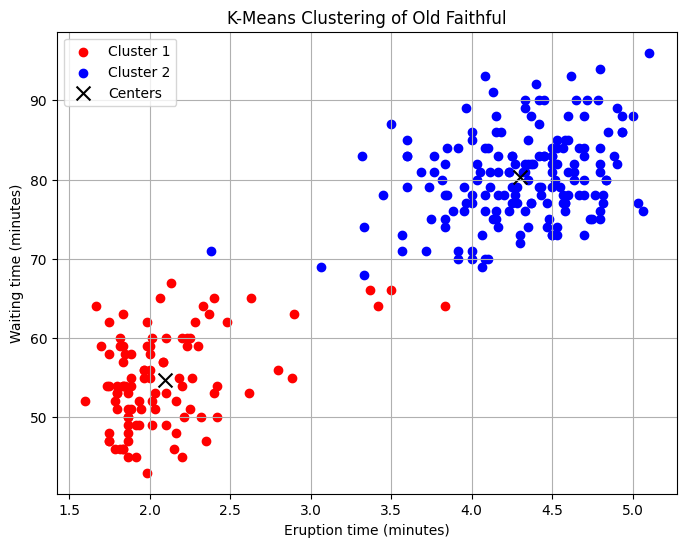

In [ ]:
# Problem 2 - (b)	A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)

# Scatter plot of final clustering
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(8,6))
for cluster_idx, cluster in enumerate(clusters):
    points = X[cluster]
    plt.scatter(points[:,0], points[:,1], color=colors[cluster_idx], label=f'Cluster {cluster_idx+1}')

plt.scatter(centers[:,0], centers[:,1], c='black', marker='x', s=100, label='Centers')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering of Old Faithful')
plt.legend()
plt.grid(True)
plt.show()

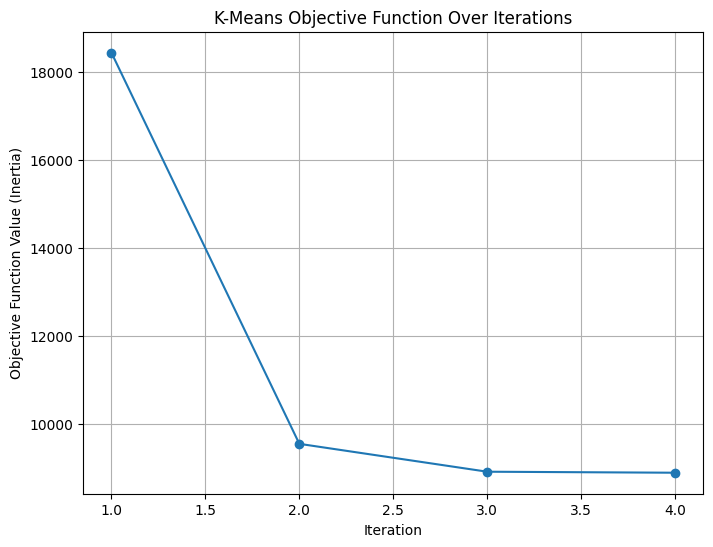

In [6]:
# Problem 2 - (c) A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is  (10 points)

# Plot of objective function vs iterations
plt.figure(figsize=(8,6))
plt.plot(range(1, len(kmeans.inertia_)+1), kmeans.inertia_, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Inertia)')
plt.title('K-Means Objective Function Over Iterations')
plt.grid(True)
plt.show()

In [ ]:
# Problem 2 - (d)	Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)
# Solution:
# In my opinion, the k-means method did manage to find the two clusters that I had identified earlier in Problem 1 based on the scatter plot.
#After running the k-means algorithm, I could clearly see that the data points were divided into two distinct groups, just as we observed visually in the initial scatter plot. The centers of the clusters also appeared in the expected areas, with one cluster corresponding to the shorter eruption times and the other to the longer eruption times.

# However, since k-means is sensitive to the initial placement of the centroids, I noticed that there could be slight variations in the cluster boundaries each time I ran the algorithm due to the random initialization of the centroids. In fact, running the algorithm multiple times can sometimes help achieve better or more stable results, especially if the initial centroids were poorly chosen.

# To make sure the clustering was consistent, I ran the method a few more times with different random initializations, and the results were quite similar each time. So, even though the random initialization can affect the clustering, in this case, it didn’t cause major issues — the algorithm still found the clusters well.
# In summary, the method did indeed find the clusters that I identified, but running the algorithm with different initializations helped ensure a more reliable result.
